<a href="https://colab.research.google.com/github/chw8207/NLP-study/blob/main/Word2Vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Word2Vec 개념
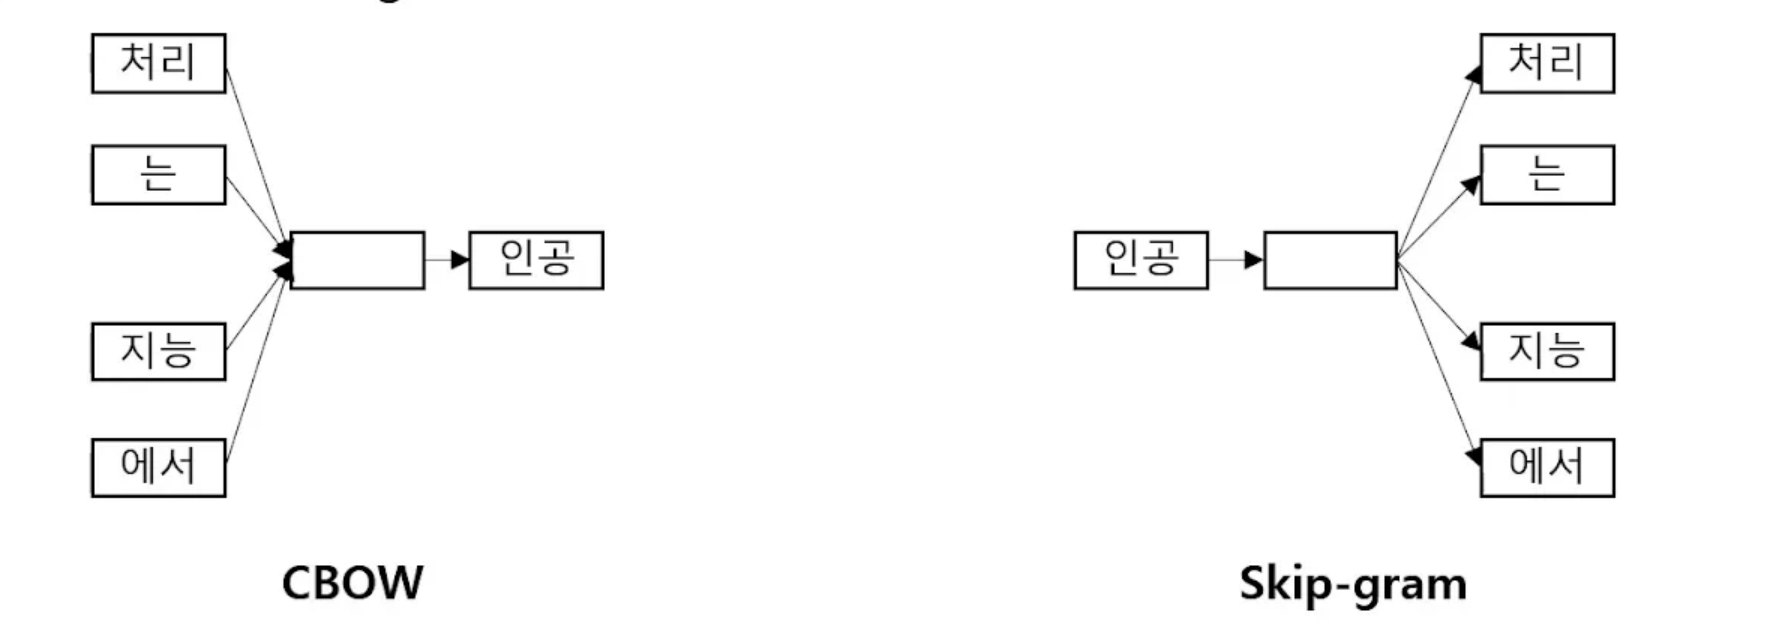

- CBOW : 문맥을 입력으로 하고 타겟을 출력
 - 주변 단어를 통해 가운데 단어를 맞추기
- Skio-gram : 타켓을 입력하고 문맥을 출력
 - 중간 단어를 통해 주변 단어를 맞추기기

- Bag of words : 사용한 단어가 다르면 완전 다르게 표현
- Word2Vec : 사용한 단어가 달라도 의미적으로 유사한 것은 유사하게 표현

In [1]:
ROOT_PATH = '/content/drive/MyDrive/Colab Notebooks/자연어처리공부/NLP-study/NLP-study/data/resource/'

### Mecacb 형태소 분석기 Colab에서 사용

In [7]:
! git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 122, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 122 (delta 15), reused 10 (delta 3), pack-reused 91
Receiving objects: 100% (122/122), 1.27 MiB | 21.72 MiB/s, done.
Resolving deltas: 100% (54/54), done.


In [8]:
! ls Mecab-ko-for-Google-Colab

images					   LICENSE
install_mecab-ko_on_colab190912.sh	   README.md
install_mecab-ko_on_colab_light_220429.sh


In [9]:
! bash Mecab-ko-for-Google-Colab/install_mecab-ko_on_colab_light_220429.sh

Installing konlpy.....
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 91.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 46.6 MB/s eta 0:00:00
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2023-05-01 07:39:02--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 104.192.141.1, 2406:da00:ff00::22c0:3470, 2406:da00:ff00::22c5:2ef4, ...
Connecting to bitbucket.org (bitbucket.org)|104.192.141.1|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://bbuseruploads.s3.amazonaws.com/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz?response-content-disposition=attachment%3B%20filename%3D%22mecab-0.996-ko-0.9.2.tar.gz%22&response-content-encoding=None&AWSAccessKeyId=

### Colab에서 한글 시각화하기

In [2]:
!apt -qq -y install fonts-nanum

The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 24 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 122518 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20180306-3_all.deb ...
Unpacking fonts-nanum (20180306-3) ...
Setting up fonts-nanum (20180306-3) ...
Processing triggers for fontconfig (2.13.1-2ubuntu3) ...


In [2]:
import matplotlib.font_manager as fm
from matplotlib import rc

font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fontprop = fm.FontProperties(fname=font_path)
rc('font', family=fontprop.get_name(), size=16)

### 한글 영화후기 데이터 불러오기

In [ ]:
# 출처 : https://github.com/e9g/nsmc
import pandas as pd
df_train = pd.read_csv(ROOT_PATH + 'ratings_train.txt', sep='\t')  # \t : 탭으로 구분
df_train.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [ ]:
# 정보 확인
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        150000 non-null  int64 
 1   document  149995 non-null  object
 2   label     150000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.4+ MB


In [ ]:
# 결측치 제거 
df_train.dropna(inplace=True)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149995 entries, 0 to 149999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        149995 non-null  int64 
 1   document  149995 non-null  object
 2   label     149995 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.6+ MB


### Word2Vec 학습하기

In [ ]:
from gensim.models import Word2Vec
from tqdm import tqdm

In [10]:
from konlpy.tag import Mecab

In [12]:
mecab = Mecab()

In [ ]:
mecab.morphs(df_train['document'][0])

['아', '더', '빙', '.', '.', '진짜', '짜증', '나', '네요', '목소리']

In [ ]:
mecab.nouns(df_train['document'][0])

['짜증', '나', '목소리']

In [ ]:
# 토큰화를 15만개의 데이터에 대해 적용
sentence_list = []
for sentence in tqdm(df_train['document']) : 
  sentence_list.append(mecab.morphs(sentence))

len(sentence_list)

100%|██████████| 149995/149995 [00:15<00:00, 9855.40it/s] 


149995

In [ ]:
sentence_list[3]

In [ ]:
# window : target(중심)단어를 중심으로 왼쪽 오른쪽으로 몇 개의 문맥 단어를 확인?
# sg(skip-gram) : 1=skip-gram, 0=cbow
# max_vocab_size=None : 특정 개수의 토큰만 보여주는 것이 아님
# min_count : sentence_list안에서 등장한 토큰 중 최소 몇 개 이상 등장한 토큰만 사용
model = Word2Vec(sentences=sentence_list, vector_size=100, window=5,
                 sg=1, max_vocab_size=None, min_count=5)

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/자연어처리공부/NLP-study/NLP-study/' + 'word2vec.model')

In [ ]:
loaded_model = Word2Vec.load('/content/drive/MyDrive/Colab Notebooks/자연어처리공부/NLP-study/NLP-study/' + 'word2vec.model')

In [ ]:
# 학습 결과 확인
loaded_model.wv.vectors.shape

(16064, 100)

In [ ]:
# 원하는 결과 확인
loaded_model.wv.get_vector('영화')

array([-0.1864493 ,  0.1897279 ,  0.06888814, -0.05231182, -0.00315567,
       -0.23420507,  0.26807874,  0.34100792,  0.27192336, -0.39109564,
        0.21680623, -0.5380932 , -0.20863074,  0.00159948,  0.01475105,
       -0.31880116,  0.01421934, -0.22786047, -0.06972145, -0.52006024,
        0.09386948, -0.02462002,  0.5655034 ,  0.01434594, -0.12871906,
       -0.18188357, -0.02835607, -0.0434787 , -0.2095016 , -0.02474607,
        0.46395227,  0.14744458,  0.42348707, -0.29664165, -0.03088054,
        0.20402148,  0.23612976,  0.00550728,  0.02065716, -0.41336608,
        0.0498195 ,  0.03394419, -0.22453208, -0.06697109,  0.20854406,
        0.10112689,  0.23305857, -0.09518424,  0.06111496,  0.31278265,
        0.05234057,  0.20356613,  0.02583075, -0.11150643, -0.35244855,
       -0.11114725,  0.14078595, -0.0102013 , -0.20674078, -0.01142152,
        0.10630053,  0.0036918 ,  0.25156853,  0.07157325, -0.01041169,
        0.09454704, -0.0050541 ,  0.82319623, -0.7492505 , -0.01

In [ ]:
# 유사도 확인 : 코사인 유사도
loaded_model.wv.most_similar('영화')

[('공포물', 0.7485646605491638),
 ('애니메이션', 0.7418715953826904),
 ('스릴러물', 0.7247403860092163),
 ('다큐멘터리', 0.715724527835846),
 ('드라마', 0.7142416834831238),
 ('영상물', 0.712453305721283),
 ('영회', 0.7114739418029785),
 ('애니', 0.6939322352409363),
 ('작품', 0.6830384135246277),
 ('케이스', 0.6811442971229553)]

In [ ]:
loaded_model.wv.most_similar('배우')

[('여배우', 0.7716580033302307),
 ('연기자', 0.771033525466919),
 ('명배우', 0.7356663942337036),
 ('조연', 0.7173969745635986),
 ('출연진', 0.7022428512573242),
 ('연기파', 0.7005872130393982),
 ('배역', 0.6796699166297913),
 ('발성', 0.6732494235038757),
 ('톱스타', 0.6708788871765137),
 ('엑스트라', 0.6658068299293518)]

In [ ]:
loaded_model.wv.most_similar('박하선')

[('이기광', 0.9195351004600525),
 ('이진', 0.9102194905281067),
 ('박형식', 0.9023698568344116),
 ('채시라', 0.9018615484237671),
 ('이준', 0.9009213447570801),
 ('이홍기', 0.9003732800483704),
 ('기광', 0.897381067276001),
 ('김석훈', 0.8960980772972107),
 ('이시영', 0.8925564885139465),
 ('윤상현', 0.8904590010643005)]

In [ ]:
loaded_model.wv.most_similar('OST')

[('ost', 0.852678656578064),
 ('음악', 0.7634632587432861),
 ('주제곡', 0.7506297826766968),
 ('사운드트랙', 0.7410616874694824),
 ('영상미', 0.7408048510551453),
 ('주제가', 0.7393790483474731),
 ('삽입곡', 0.7263422012329102),
 ('BGM', 0.7083144783973694),
 ('노래', 0.7057280540466309),
 ('Ost', 0.6987584829330444)]

### Word2Vec 시각화

In [16]:
from gensim.models import Word2Vec 
loaded_model = Word2Vec.load('/content/drive/MyDrive/Colab Notebooks/자연어처리공부/NLP-study/NLP-study/'+'word2vec.model')
loaded_model.wv.vectors.shape

(16064, 100)

In [21]:
import numpy as np

# 시각화할 단어
words_to_show = ['스토리', '내용', '시나리오', '줄거리', 'OST', '음악', '영상', 
                 '주제곡', '배우', '연기자', '주연', '소지섭']

words_to_show_matrix = np.zeros((12,100))
for i in range(len(words_to_show)) : 
  words_to_show_matrix[i,:] = loaded_model.wv.get_vector(words_to_show[i])

words_to_show_matrix.shape

(12, 100)

In [23]:
words_to_show_matrix

array([[-0.20752296,  0.14616267,  0.09769259, ...,  0.02671137,
         0.39690602, -0.17508893],
       [-0.03791703, -0.04272617, -0.21371323, ...,  0.03065533,
         0.04716533, -0.07454965],
       [-0.53109062, -0.00794074,  0.07317985, ...,  0.22216119,
         0.3378377 ,  0.06058939],
       ...,
       [-0.14170656,  0.36052486, -0.27544835, ...,  0.36950397,
         0.17800713,  0.05691012],
       [-0.43280998,  0.47017756, -0.43424666, ..., -0.13421395,
         0.25857046, -0.07804929],
       [-0.20311303,  0.38768262, -0.09061667, ...,  0.07836217,
         0.39963931,  0.04569331]])

In [25]:
# Principal component analysis(주성분 분석)

from sklearn.decomposition import PCA

# n_components : n차원으로 축소
pca_model = PCA(n_components=2)
words_to_show_matrix_2d = pca_model.fit_transform(words_to_show_matrix)
words_to_show_matrix_2d.shape

(12, 2)

In [27]:
words_to_show_matrix_2d

array([[-0.43014421,  1.59851787],
       [-0.66483235,  1.26719147],
       [ 0.34044716,  1.25509097],
       [-0.28617273,  1.20317088],
       [-0.90722455, -0.94114116],
       [-1.30073706, -1.14407883],
       [-1.44019278, -0.61923996],
       [-0.38936738, -0.77860252],
       [ 1.49908676, -0.6142161 ],
       [ 1.57615957, -0.17279469],
       [ 1.40315366, -0.32938579],
       [ 0.59982392, -0.72451213]])

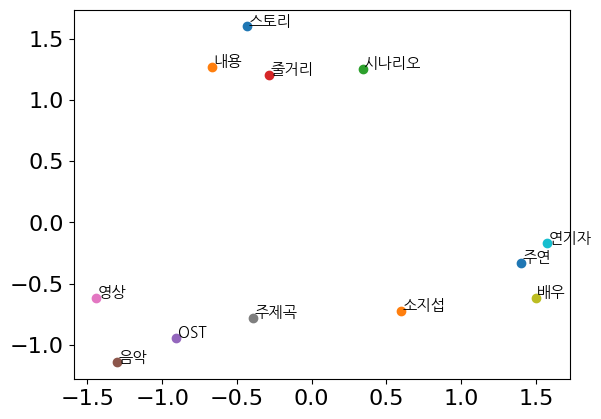

In [31]:
# 각 단어를 평면 안 점으로 표현하기
import matplotlib.pyplot as plt
%matplotlib inline

for i, word in enumerate(words_to_show) : 
  x = words_to_show_matrix_2d[i][0]
  y = words_to_show_matrix_2d[i][1]
  plt.scatter(x,y)
  plt.text(x + 0.01, y + 0.01, word, fontsize=11, font_properties=fontprop)
plt.show()